In [15]:
from obspy import read
import numpy as np
from matplotlib import cm
from scipy.signal import hilbert
import matplotlib.pyplot as plt
from scipy import signal

# Ruta al archivo .mseed
data_directory = '../../data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1969-12-16HR00_evid00006.mseed'
mseed_file = f'{data_directory}'

In [16]:
st = read(mseed_file)
st

1 Trace(s) in Stream:
XA.S12.00.MHZ | 1969-12-16T00:00:00.178000Z - 1969-12-17T00:00:03.498755Z | 6.6 Hz, 572423 samples

In [17]:
tr = st.traces[0].copy()
tr_times = tr.times()
tr_data = tr.data

In [38]:
# Set the minimum frequency
minfreq = 0.05

# Going to create a separate trace for the filter data
st_filt = st.copy()
st_filt.filter('highpass',freq=minfreq)
tr_filt = st_filt.traces[0].copy()
tr_times_filt = tr_filt.times()
tr_data_filt = tr_filt.data

In [39]:
f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)

C:\Users\hombr\AppData\Local\Temp\ipykernel_5652\926705533.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


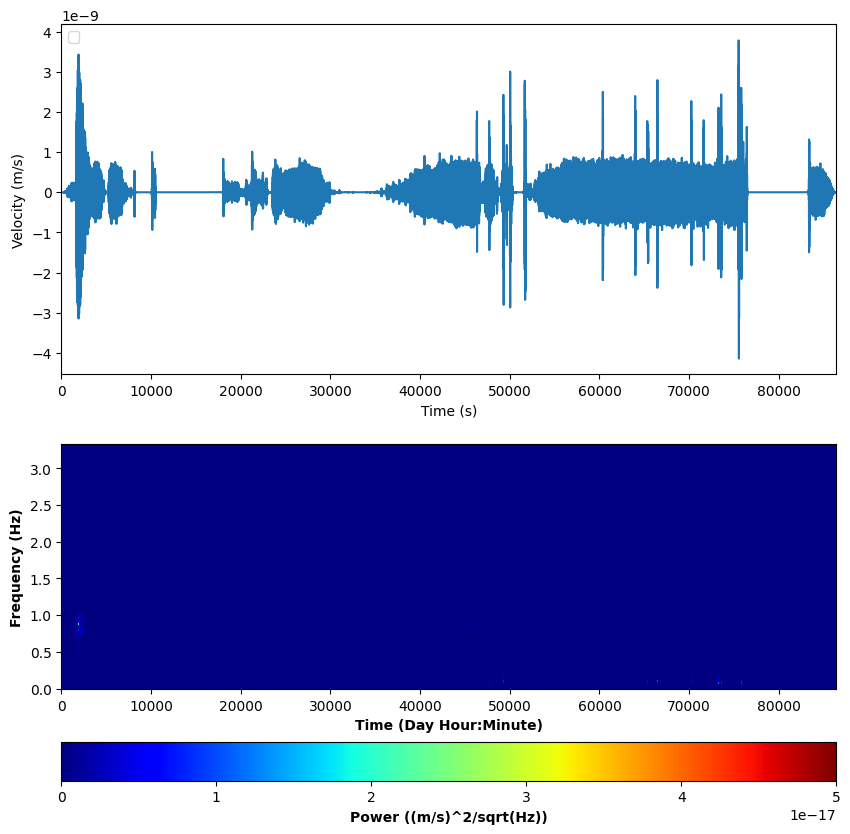

In [40]:
# Plot the time series and spectrogram
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
# Plot trace
ax.plot(tr_times_filt,tr_data_filt)

ax.legend(loc='upper left')
# Make the plot pretty
ax.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')

ax2 = plt.subplot(2, 1, 2)
vals = ax2.pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)
ax2.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax2.set_xlabel(f'Time (Day Hour:Minute)', fontweight='bold')
ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
cbar = plt.colorbar(vals, orientation='horizontal')
cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')